# Gabor Filters

Tomoki Tsuchida

In [1]:
%load_ext autoreload 
%autoreload 2
%matplotlib inline

from numpy import *
from IPython.html.widgets import *
import matplotlib.pyplot as plt
from IPython.core.display import clear_output

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# What are Gabor filters?

* Gabor filter, named after the physicist and electrical engineer Dennis Gabor, is a linear filter used for edge detection in image processing.

<img src="files/images/Gabors/Dennis_Gabor.jpg" style="margin:auto; width: 211px;"/>

(Trivia: Dennis Gabor invented holography and received Nobel Prize in 1971!) 

* A single Gabor filter looks like this:

<img src="files/images/Gabors/filter.png" style="margin:auto; width: 211px;"/>

(Here, blue means positive and red means negative.  We'll get to more details in a minute!)

Gabor filters were originally introduced as an acoustic (1D) filter to explain audition. 

<img src="files/images/Gabors/paper.png" style="margin:auto; width: 25%;"/>

But in this demo, we'll be dealing with Gabor as image (2D) filters.

In both 1D and 2D, a Gabor filter is a product of the *Gaussian envelope* and the *sinusoidal carrier*:

$$g(x,y; \lambda, \theta, \phi, \sigma, \gamma) = \underbrace{\exp\left( -\frac{x'^2 + \gamma^2 y'^2}{2\sigma^2} \right)}_{\textrm{Gaussian}}
\underbrace{ \cos\left( 2 \pi \frac{x'}{\lambda} + \phi\right)}_{\textrm{Sinusoid}}$$

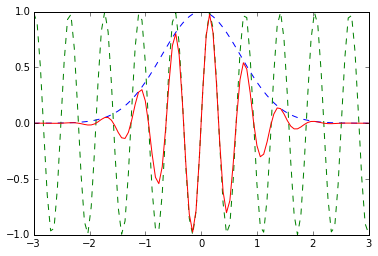

In [5]:
xs=linspace(-3, 3, 100)
gaussian=exp(-xs**2)
sinusoid=sin(xs*10)
plt.plot(xs, gaussian, '--')
plt.plot(xs, sinusoid, '--')
plt.plot(xs, gaussian*sinusoid)

Each filter is characterized by these parameters:

 * For the Gaussian part: standard deviation $\sigma$, the ellipticity $\gamma$
 * For the sinuosoid part: the wavelength $\lambda$, orientation $\theta$, phase offset $\phi$

Exercise 1. Let's create some 2D Gabor filters and visualize them. 

(-0.5, 36.5, 36.5, -0.5)

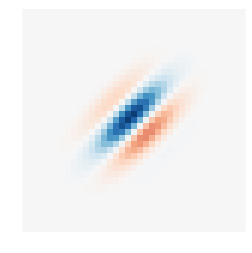

In [6]:
#from skimage.filters import gabor_kernel   
#   ^--- if you have latest version of scikit-image installed.
from filters import gabor_kernel

g=gabor_kernel(frequency=0.1, theta=pi/4, 
               sigma_x=3.0, sigma_y=5.0, offset=pi/5, n_stds=5)
plt.imshow(real(g), cmap='RdBu', interpolation='none', 
           vmin=-abs(g).max(), vmax=abs(g).max())
plt.axis('off')

## What do Gabor filters do?

 * Gabor filters are good **feature detectors**.
 * Each filter is sensitive to **edges** with specific **orientations** at specific **locations**.
 * However, there is a trade-off between spatial resolution and frequency resolution ("Uncertainty Principle").
   * If you have high spatial resolution (know where the edge occurs), you have less certainty in the frequency contents.
 * It turns out, mathematically, Gabor filter achieves a kind of optimal space-time trade-off. 

Exercise 2. Let's apply different Gabor filters to an image and visualize the filter responses. 

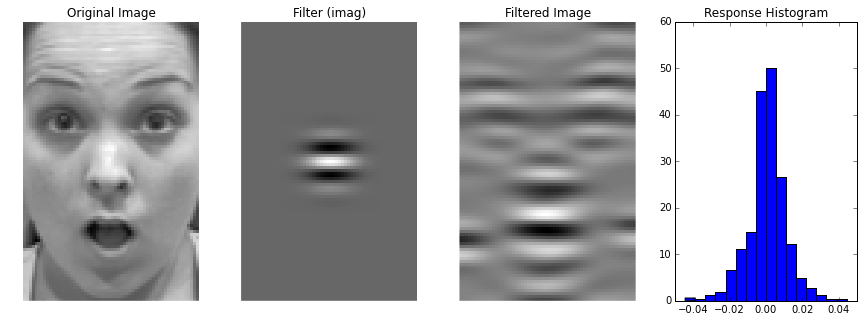

In [4]:
#from skimage.filters import gabor_filter
from filters import gabor_filter
import pickle
dataset=pickle.load(open('cafe.pkl','r')) # or 'pofa.pkl' for POFA

import demo
interactive(demo.plot_gabor_filtering, 
            dataset=fixed(dataset),
            image_id=(0,dataset.images.shape[0]-1),
            frequency=FloatSlider(min=0.001, max=0.5, value=0.1),
            theta=FloatSlider(min=0, max=pi, value=pi / 2.0),
            real_or_imag={'Real': 0, 'Imag': 1})

## But, why are Gabor filters good for cognitive modeling?

It turns out Gabor filters are good model for capturing the *statistics* of natural images.  We will see why that is, in the `Dictionary Learning` demo!